<a href="https://colab.research.google.com/github/tigrannh/Data-Science-ML-projects/blob/main/Avocado_Average_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install pandas

You should consider upgrading via the 'C:\Users\lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#### Read the 'avocado.csv' with pandas. Make sure a new unnecessary column is not generated.

In [ ]:
avocado_df = pd.read_csv('avocado.csv', index_col=0)

#### Explore the dataset, pay attention to redundancies, note the categorical (non-numeric) variables.

In [ ]:
avocado_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
avocado_df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [ ]:
avocado_df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [ ]:
difference = avocado_df['Total Bags'] - (avocado_df['Small Bags'] + avocado_df['Large Bags'] + avocado_df['XLarge Bags'])
dist = difference.abs()
dist.sum()

75.00000020441107

In [ ]:
print(len(dist), sum(dist==0))

18249 14213


In [ ]:
max(dist)

1.0

#### Drop the unnecessary columns, if any. 

In [ ]:
avocado_df.drop(columns='Total Bags', inplace=True)

#### Choose the 'AveragePrice' column as your target (y) variable.

In [ ]:
y = avocado_df['AveragePrice']
X = avocado_df.iloc[:, 1:]

#### Plot the relationship of each of the numerical features with the target variable

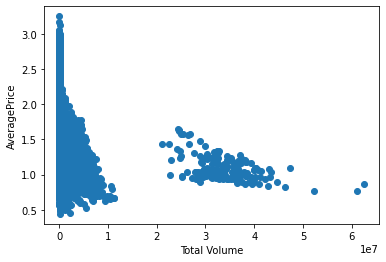

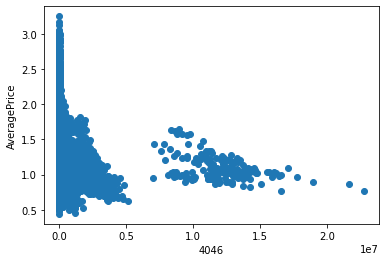

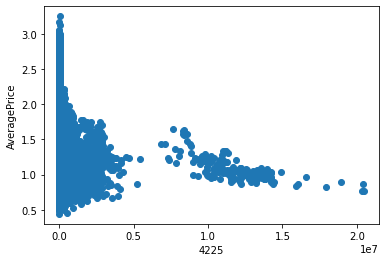

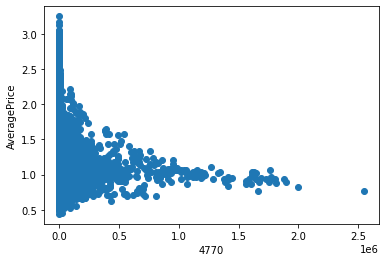

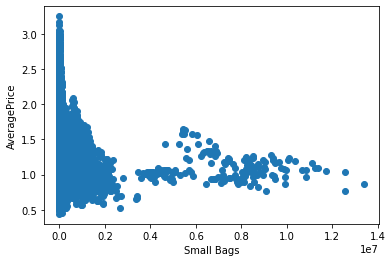

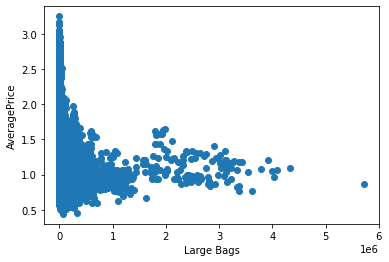

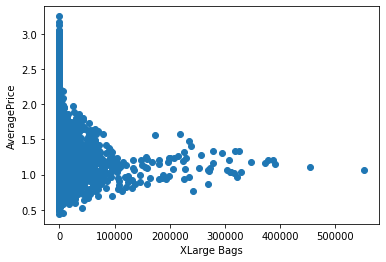

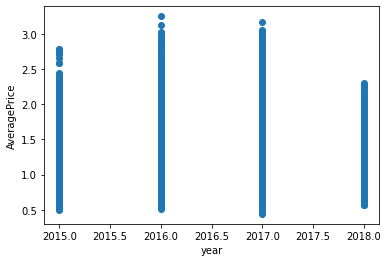

In [ ]:
for num_col in X.select_dtypes(include=np.number):
    plt.scatter(X[num_col], y)
    plt.xlabel(num_col)
    plt.ylabel('AveragePrice')
    plt.show()

#### Convert categorical variables to numeric. 
#### Note: variables with little amount of unique values are better to be considered categoricals.

In [ ]:
pd.get_dummies(X['year'])

,2015,2016,2017,2018
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
7,0,0,0,1
8,0,0,0,1
9,0,0,0,1
10,0,0,0,1


In [ ]:
years = np.unique(X['year'])
for year in years:
    new_year = 'year' + str(year)
    X[new_year] = 0
    X.loc[X['year'] == year, new_year] = 1
X.drop(columns='year', inplace=True)

In [ ]:
X.loc[:, 'region'] = X.loc[:, 'region'].astype('category').cat.codes
X.loc[:, 'type'] = X.loc[:, 'type'].astype('category').cat.codes

In [ ]:
X

,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region,year2015,year2016,year2017,year2018
0,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,0,1,0,0,0
1,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,0,0,1,0,0,0
2,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,0,0,1,0,0,0
3,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,0,1,0,0,0
4,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,17074.83,2046.96,1529.20,0.00,13066.82,431.85,0.0,1,53,0,0,0,1
8,13888.04,1191.70,3431.50,0.00,8940.04,324.80,0.0,1,53,0,0,0,1
9,13766.76,1191.92,2452.79,727.94,9351.80,42.31,0.0,1,53,0,0,0,1
10,16205.22,1527.63,2981.04,727.01,10919.54,50.00,0.0,1,53,0,0,0,1


#### Divide data into Train and Test sets with the ratio 80:20.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 20)
X_train.shape, X_test.shape

((14599, 13), (3650, 13))

#### Train linear Regression model using the training set

In [ ]:
regression = LinearRegression()
regression.fit(X_train.to_numpy(), y_train.to_numpy())

LinearRegression()

#### Calculate the mean squared error for the test set

In [ ]:
mean_squared_error(y_test.to_numpy(), regression.predict(X_test.to_numpy()))

0.09024495337223984

#### Implement the following functions: mean_squared_error, mean_absolute_error, r2_score.
#### Each of them should have 2 vector arguments and return the appropriate score.

In [ ]:
def mean_squared_error_2(y_test, y_pred):
    return np.sum((y_test - y_pred)**2) / len(y_test)

def mean_absolute_error_2(y_test, y_pred):
    return np.sum(np.abs(y_test - y_pred)) / len(y_test)

def TSS_2(y_test):
    return np.sum((y_test - y_test.mean())**2)

def RSS_2(y_test, y_pred):
    return np.sum((y_test - y_pred)**2)

def r2_score_2(y_test, y_pred):
    return 1 - RSS_2(y_test, y_pred) / TSS_2(y_test)

#### Compare the resulting scores of your functions and the scores of corresponding sklearn functions for the test set. They should be the same.

In [ ]:
y_pred = regression.predict(X_test.to_numpy())

print("mean_squared_error", mean_squared_error(y_test, y_pred), sep='  ')
print("mean_squared_error_2", mean_squared_error_2(y_test, y_pred), sep='  ', end='\n\n')
print("mean_absolute_error", mean_absolute_error(y_test, y_pred),sep='  ')
print("mean_absolute_error_2", mean_absolute_error_2(y_test, y_pred), sep='  ', end='\n\n')
print("r2_score", r2_score(y_test, y_pred), sep='  ')
print("r2_score_2", r2_score_2(y_test, y_pred), sep='  ')

mean_squared_error  0.09024495337223984
mean_squared_error_2  0.09024495337223984

mean_absolute_error  0.22867581841155427
mean_absolute_error_2  0.22867581841155427

r2_score  0.4571161433951566
r2_score_2  0.4571161433951566
